# THYROID CANCER RECURRENCE PREDICTION USING MACHINE LEARNING

#### This Project shows us how machine learning can be used to predict if a patient has thyroid cancer or not using python programming

##### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,RandomForestRegressor , AdaBoostRegressor
from xgboost import XGBClassifier , XGBRegressor
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor , GradientBoostingClassifier
from sklearn.svm import SVC , SVR
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score , classification_report , accuracy_score , f1_score , precision_score
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### Read the Dataframe using the Pandas Library

In [3]:
df=pd.read_csv('Thyroid_Diff.csv')

In [4]:
#First five rows of the DataFrame
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


### Summary of the Dataframe and its Variables

##### Variables:
<ul>
<li>Age: Integer Data</li>
<li>Gender: Categorical Data</li>
<li>Smoking: Categorical Data</li>
<li>Hx Smoking: Categorical Data</li>
<li>Hx Radiothreapy: Categorical Data</li>
<li>Thyroid Function: Categorical Data</li>
<li>Physical Examination: Categorical Data</li>
<li>Adenopathy: Categorical Data</li>
<li>Pathology: Categorical Data</li>
<li>Focality: Categorical Data</li>
<li>Risk: Categorical Data</li>
<li>T: Categorical Data</li>
<li>N: Categorical Data</li>
<li>M: Categorical Data</li>
<li>Stage: Categorical Data</li>
<li>Response: Categorical Data</li>

##### Target Variable:
<ul>
<li>Recurred: Categorical Data.</li>
</ul>

#### Exploratory Data Analysis(EDA)
##### A Simple understnding of the dataframe and its compenents

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

##### The attribute Age is the only dependent variable that is in integer format. Whereas the rest of the variables are in object format.

In [6]:
#The last 5 rows of the Dataframe
df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [7]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [8]:
columns=list(df.columns)
cat_columns=[]  #Categorical columns
num_columns=[]  #Numeric columns

In [9]:
for i in columns:
    if len(df[i].unique())>8:
        num_columns.append(i)
    else:
        cat_columns.append(i)
cat_columns=cat_columns[:-1]    

In [10]:
print("Numeric Columns:",num_columns)
print("Categorical Columns:",cat_columns)

Numeric Columns: ['Age']
Categorical Columns: ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']


### Visualizing Relation between attributes

Text(0.5, 1.0, 'Relation between age and cancer recurrence')

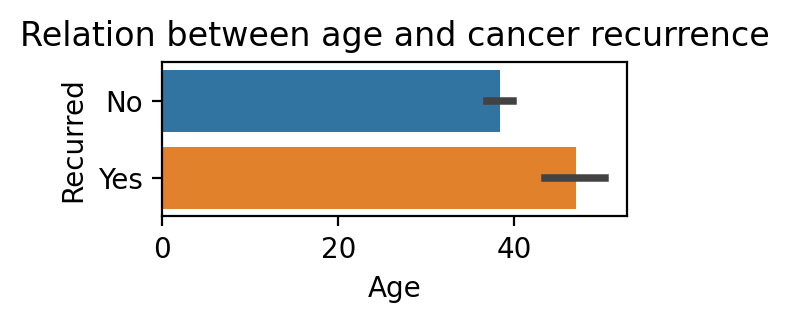

In [11]:
fig=plt.figure(figsize=(3,1),dpi=200)
sns.barplot(x='Age',y='Recurred',data=df)
plt.xlabel("Age")
plt.ylabel("Recurred")
plt.title("Relation between age and cancer recurrence")

Text(0.5, 1.0, 'Relation between Age and Gender')

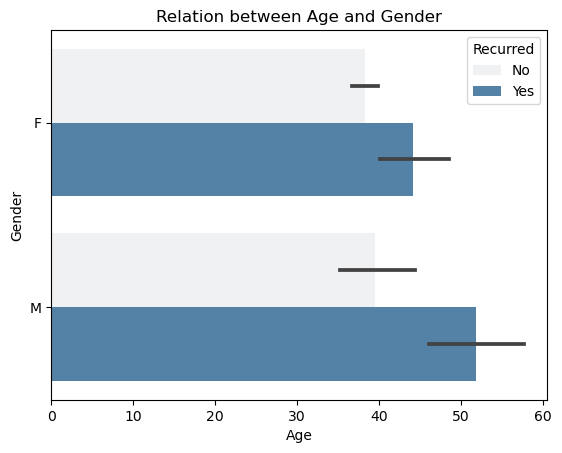

In [12]:
sns.barplot(x='Age',y='Gender',data=df,hue='Recurred',color='steelblue')
plt.xlabel("Age")
plt.ylabel("Gender")
plt.title("Relation between Age and Gender")

#### Feature Engneering

##### Spilitting the Data into Test Data and Train Data

In [13]:
X=df.drop('Recurred',axis=1) #Independent Variables
y=df[['Recurred']] #Dependent Variables

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
X.head(3)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent


In [16]:
y.head(3)

,Recurred
0,No
1,No
2,No


In [17]:
print(X_train.shape)
print(y_train.shape)

(268, 16)
(268, 1)


#### Feature Scaling

In [18]:
Standard_Scaler=StandardScaler()
X_train[num_columns] = Standard_Scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = Standard_Scaler.transform(X_test[num_columns])


#### Encoding The Categorical Values

In [19]:
label_encoder = LabelEncoder() #To convert Categorical Data to Numeric Data
y_train = label_encoder.fit_transform(y_train)
object_columns = X_train.select_dtypes(include=['object']).columns
for column in object_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    
y_test = label_encoder.fit_transform(y_test)
object_columns = X_test.select_dtypes(include=['object']).columns
for column in object_columns:
    X_test[column] = label_encoder.fit_transform(X_test[column])

In [20]:
X_train.head(20)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
85,-1.039158,0,0,1,1,2,4,3,3,1,2,1,0,0,0,1
58,-1.179000,0,0,0,0,0,3,3,3,1,2,1,0,0,0,1
349,1.967435,1,1,1,0,4,3,0,3,0,1,4,2,0,2,3
224,-1.388762,1,0,0,0,2,4,5,3,1,2,2,0,0,0,3
242,1.128386,1,0,0,0,2,1,3,3,1,2,2,0,0,0,0
171,-1.318841,0,0,0,0,2,3,3,3,1,2,2,0,0,0,1
268,-0.549713,0,0,0,0,2,3,3,3,1,2,3,0,0,0,1
131,-0.619634,0,0,0,0,2,3,3,3,1,2,2,0,0,0,1
343,0.289336,0,0,0,0,2,3,2,3,0,1,4,2,0,0,3
356,0.988544,1,1,0,0,2,3,5,1,0,1,5,2,0,1,3


In [21]:
print(X_train.shape)
print(y_train.shape)

(268, 16)
(268,)


### Building Models

In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Response                0.392513
Risk                    0.189746
N                       0.096748
T                       0.086049
Age                     0.056484
Adenopathy              0.044142
Stage                   0.033395
Gender                  0.017403
Physical Examination    0.017374
Thyroid Function        0.016670
Focality                0.016390
Pathology               0.012481
M                       0.008461
Smoking                 0.007880
Hx Smoking              0.003953
Hx Radiothreapy         0.000310
dtype: float64

In [23]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=0)
perm_importances = pd.DataFrame(perm_importance.importances, index=X_test.columns).T
perm_importance_df = pd.DataFrame(perm_importance.importances_mean, index=X_test.columns, columns=['Importance'])
perm_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("\nPermutation Importances:")
print(perm_importance_df)


Permutation Importances:
                      Importance
Response                0.264348
Risk                    0.004638
Physical Examination    0.004058
Smoking                 0.003188
Hx Smoking              0.003188
Age                     0.003188
T                       0.003188
M                       0.002899
Thyroid Function        0.000580
Stage                   0.000580
Hx Radiothreapy         0.000000
Pathology              -0.000870
Gender                 -0.002319
Focality               -0.006377
N                      -0.007536
Adenopathy             -0.012464


### Buidling a Tree Decision Model

In [24]:
dtc = DecisionTreeClassifier(max_depth = 10, random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

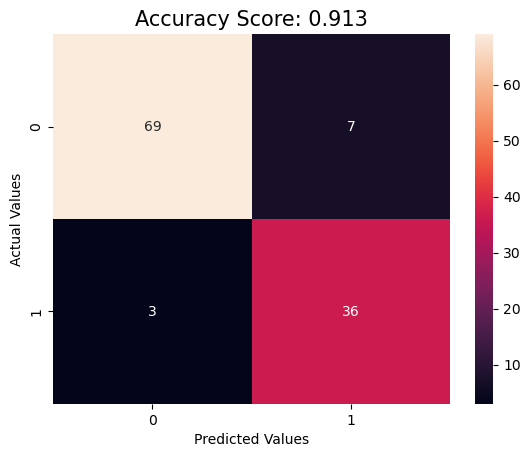

In [25]:
predictions = dtc.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
sns.color_palette(palette='Accent')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

##### The Accuacy Score of the model is 0.913 which is a very strong prediction accuracy score

### Building a Linear Regression Model

In [26]:
le=LinearRegression()
le.fit(X_train,y_train)
y_lepred=le.predict(X_test)
r2=r2_score(y_test,y_lepred)
print("The Accuracy of the Linear Regression Model is:",r2)

The Accuracy of the Linear Regression Model is: 0.5874342838621769


#### The Accuracy of the Linear Regression Model is too low compared to the Decision Tree model.

## Saving the Machine Learning Model as a Pickle File.

##### We will use the Pickle library that we imported in the first cell of this notebook.

In [27]:
with open('PModel.pkl','wb') as file:
    pickle.dump(dtc,file)

## Conclusion

#### The Decison Tree Model is the best model for thsi Dataset to predict the recurrence of Thyroid Cancer in a Patient.

#### The Accuracy score is about 91.3% which is huge accuracy score.

In [28]:
df['Hx Radiothreapy'].value_counts()

Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64

In [29]:
df['Thyroid Function'].value_counts()

Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64

In [30]:
df['Adenopathy'].value_counts()

Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64

In [31]:
df['Physical Examination'].value_counts()

Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64

In [32]:
df['Pathology'].value_counts()

Pathology
Papillary         287
Micropapillary     48
Follicular         28
Hurthel cell       20
Name: count, dtype: int64

In [33]:
df['Focality'].value_counts()

Focality
Uni-Focal      247
Multi-Focal    136
Name: count, dtype: int64

In [34]:
df['T'].value_counts()

T
T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: count, dtype: int64

In [35]:
df['M'].value_counts()

M
M0    365
M1     18
Name: count, dtype: int64

In [36]:
df['Stage'].value_counts()

Stage
I      333
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64

In [37]:
df['Response'].value_counts()

Response
Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64